In [1]:
import os
import cv2 as cv
from pathlib import Path
from PIL import Image
import random

In [2]:
dir_path = 'F:/Know_I/groceries/freiburg_groceries_dataset/images/'

paths = os.listdir(dir_path)
path_label_list = []
for path in paths:
    for i in os.listdir(dir_path+path):
        path_dict = {}
        l_path = path.lower()
        path_dict = {dir_path+path+'/'+i:l_path}
        path_label_list.append(path_dict)
random.shuffle(path_label_list)
#l_path --> object
#path --> path of each category in the DIR_LIB Directory

In [3]:
len(path_label_list)
#we have 4947 items (close to 10,000)

4947

In [4]:
train = path_label_list[:-100]
test = path_label_list[len(path_label_list)-100:]
print(len(train))
print(len(test))

4847
100


In [5]:
row = 150
col = 150
channel = 3

In [6]:
from tqdm import tqdm #to increase iteration speed

In [7]:
def read_and_process(path_label_list):
    X = []
    y = []
    for path_label in tqdm(path_label_list):
        for img_path in path_label:
            image = cv.resize(cv.imread(img_path, cv.IMREAD_COLOR), (row, col), interpolation=cv.INTER_CUBIC) #scale and into X
            X.append(image)
            y.append(path_label[img_path])
        path_label
    del path_label_list
    return X, y

In [8]:
X, y = read_and_process(train)

100%|██████████████████████████████████████████████████████████████████████████████| 4847/4847 [01:06<00:00, 72.90it/s]


In [9]:
import gc

In [10]:
gc.collect()

0

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'pasta')

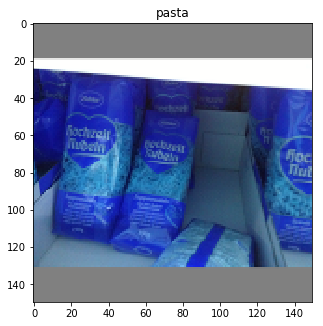

In [12]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5, 15)
plt.imshow(X[0])
plt.title(y[0])

In [13]:
print(X[0].shape)

(150, 150, 3)


In [14]:
X[0]

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]

In [15]:
y[0]

'pasta'

In [16]:
import numpy as np

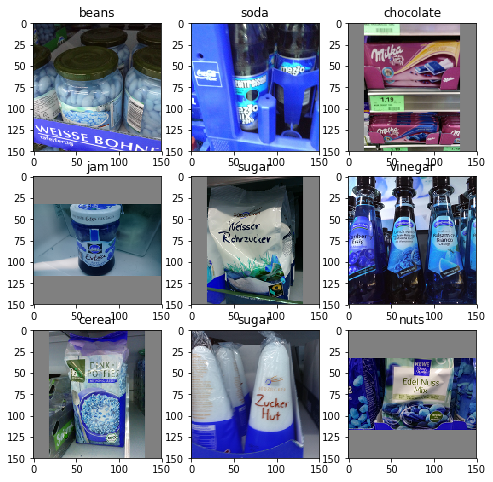

In [17]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(8, 8)
for i in range(3):
    for j in range(3):
        k = np.random.randint(0, len(y))
        ax[i, j].imshow(X[k])
        ax[i, j].set_title(y[k])

In [18]:
import seaborn as sns

Text(0.5, 1.0, 'Quantity')

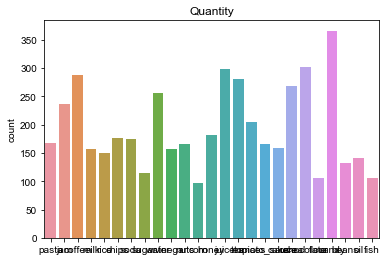

In [19]:
sns.countplot(y)
sns.set(rc={'figure.figsize':(21.7,18.0)}, font_scale=1)
plt.title('Quantity')

In [20]:
#conclusion: most data for candy, least data for corn... this is a classic imbalanced classification problem 
#This can be handled by Data Augmentation

In [21]:
np.unique(y)

array(['beans', 'cake', 'candy', 'cereal', 'chips', 'chocolate', 'coffee',
       'corn', 'fish', 'flour', 'honey', 'jam', 'juice', 'milk', 'nuts',
       'oil', 'pasta', 'rice', 'soda', 'spices', 'sugar', 'tea',
       'tomato_sauce', 'vinegar', 'water'], dtype='<U12')

In [22]:
#to reduce bias during validation, we split the data before augmenting it
from sklearn import preprocessing, model_selection
label_maker = preprocessing.LabelEncoder()
y = label_maker.fit_transform(y)

In [23]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

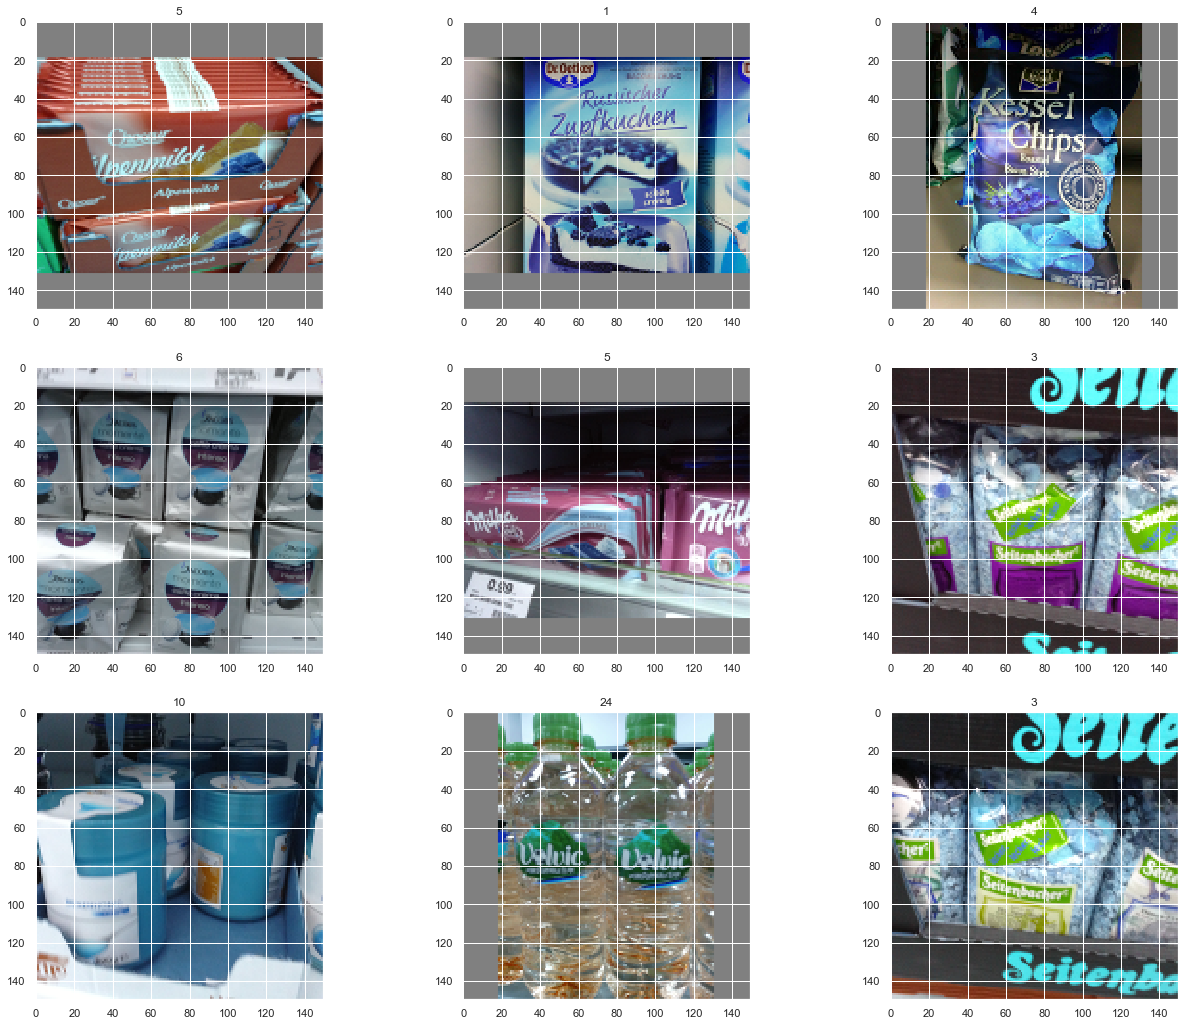

In [24]:
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        k = np.random.randint(0, len(y))
        ax[i, j].imshow(X[k])
        ax[i, j].set_title(y[k])

In [25]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size = 0.1, random_state=56)

In [26]:
print('X_TRAIN LENGTH: ', len(X_train))
print('X_VAL LENGTH: ', len(X_val))
print('Y_TRAIN LENGTH: ', len(y_train))
print('Y_VAL LENGTH: ', len(y_val))

X_TRAIN LENGTH:  4362
X_VAL LENGTH:  485
Y_TRAIN LENGTH:  4362
Y_VAL LENGTH:  485


In [27]:
del X 
del y

In [28]:
gc.collect()

17248

In [29]:
X_train = np.asarray(X_train)
X_train.shape

(4362, 150, 150, 3)

In [30]:
X_val = np.asarray(X_val)
X_val.shape

(485, 150, 150, 3)

In [31]:
X_test , y_test = read_and_process(test)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 52.18it/s]


In [32]:
X_test = np.array(X_test)
y_test = np.array(preprocessing.LabelEncoder().fit_transform(y_test))

In [33]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [34]:
#Data Augmentation: is a technique generally used to increase data size
#Data Augmentation: increases generality, thus making predictions more reliable

In [35]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [36]:
train_generator = ImageDataGenerator(rescale=1/255,
                                     rotation_range=0.1, 
                                     width_shift_range=0.1,
                                     height_shift_range=0.1, 
                                     zoom_range=20, 
                                     horizontal_flip='True', 
                                     vertical_flip='True',
                                     validation_split=0.2)

val_generator = ImageDataGenerator(rescale=1/255)
#We alter train based on many factors
#we don't alter val 
#what is rescaling? - Normalisation

In [37]:
train_gen = train_generator.flow(X_train, y_train)
val_gen = val_generator.flow(X_val, y_val)
#what does flow do? 
#flow 

In [38]:
train_length = len(X_train)
val_length = len(X_val)

In [39]:
from keras import layers, models, optimizers, models, losses
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [40]:
vgg16 = VGG16(weights = 'imagenet', include_top=False, input_tensor = layers.Input(shape=(row, col, channel)))

In [41]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [42]:
for layer in vgg16.layers:
    layer.trainable = False
    #to freeze layers
    print(layer.__class__.__name__, layer.trainable)

InputLayer False
Conv2D False
Conv2D False
MaxPooling2D False
Conv2D False
Conv2D False
MaxPooling2D False
Conv2D False
Conv2D False
Conv2D False
MaxPooling2D False
Conv2D False
Conv2D False
Conv2D False
MaxPooling2D False
Conv2D False
Conv2D False
Conv2D False
MaxPooling2D False


In [43]:
X = vgg16.layers[-2].output 
print(X)
#stores the output of the penultimate layer

Tensor("block5_conv3/Relu:0", shape=(?, 9, 9, 512), dtype=float32)


In [44]:
X = layers.Flatten()(X)
X = layers.Dropout(0.5)(X)
X = layers.Dense(4096, activation='relu')(X)
X = layers.Dense(4096, activation='relu')(X)
output = layers.Dense(25, activation='softmax')(X)

In [45]:
print(output)

Tensor("dense_3/Softmax:0", shape=(?, 25), dtype=float32)


In [46]:
groceries_model = models.Model(input=vgg16.input, output=output)

C:\Users\rps24\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [47]:
groceries_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [48]:
#-------------------------------------------------MODEL 1-----------------------------------------------------#

In [69]:
groceries_model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-4), metrics = ['acc'])

In [70]:
checkpoint = ModelCheckpoint("groceries_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False,
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

In [71]:
history_1 = groceries_model.fit_generator(generator= train_gen, 
                                 steps_per_epoch= 100, 
                                 epochs= 10, 
                                 validation_data= val_gen, 
                                 validation_steps=100, 
                                 callbacks=[checkpoint,early])

Epoch 1/10
100/100 [==============================] - 760s 8s/step - loss: 2.7122 - acc: 0.1997 - val_loss: 2.7132 - val_acc: 0.1753

Epoch 00001: val_acc improved from -inf to 0.17526, saving model to groceries_1.h5
Epoch 2/10
100/100 [==============================] - 711s 7s/step - loss: 2.7298 - acc: 0.1949 - val_loss: 2.7160 - val_acc: 0.1753

Epoch 00002: val_acc improved from 0.17526 to 0.17526, saving model to groceries_1.h5
Epoch 3/10
100/100 [==============================] - 720s 7s/step - loss: 2.6924 - acc: 0.2041 - val_loss: 2.7153 - val_acc: 0.1691

Epoch 00003: val_acc did not improve from 0.17526
Epoch 4/10
100/100 [==============================] - 1140s 11s/step - loss: 2.6821 - acc: 0.2147 - val_loss: 2.7128 - val_acc: 0.1732

Epoch 00004: val_acc did not improve from 0.17526
Epoch 5/10
100/100 [==============================] - 1534s 15s/step - loss: 2.6824 - acc: 0.2152 - val_loss: 2.7092 - val_acc: 0.1773

Epoch 00005: val_acc improved from 0.17526 to 0.17732, sa

In [72]:
groceries_model.save_weights('groceries_weights_1')

In [73]:
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

In [74]:
epochs = range(1, 1+len(acc))

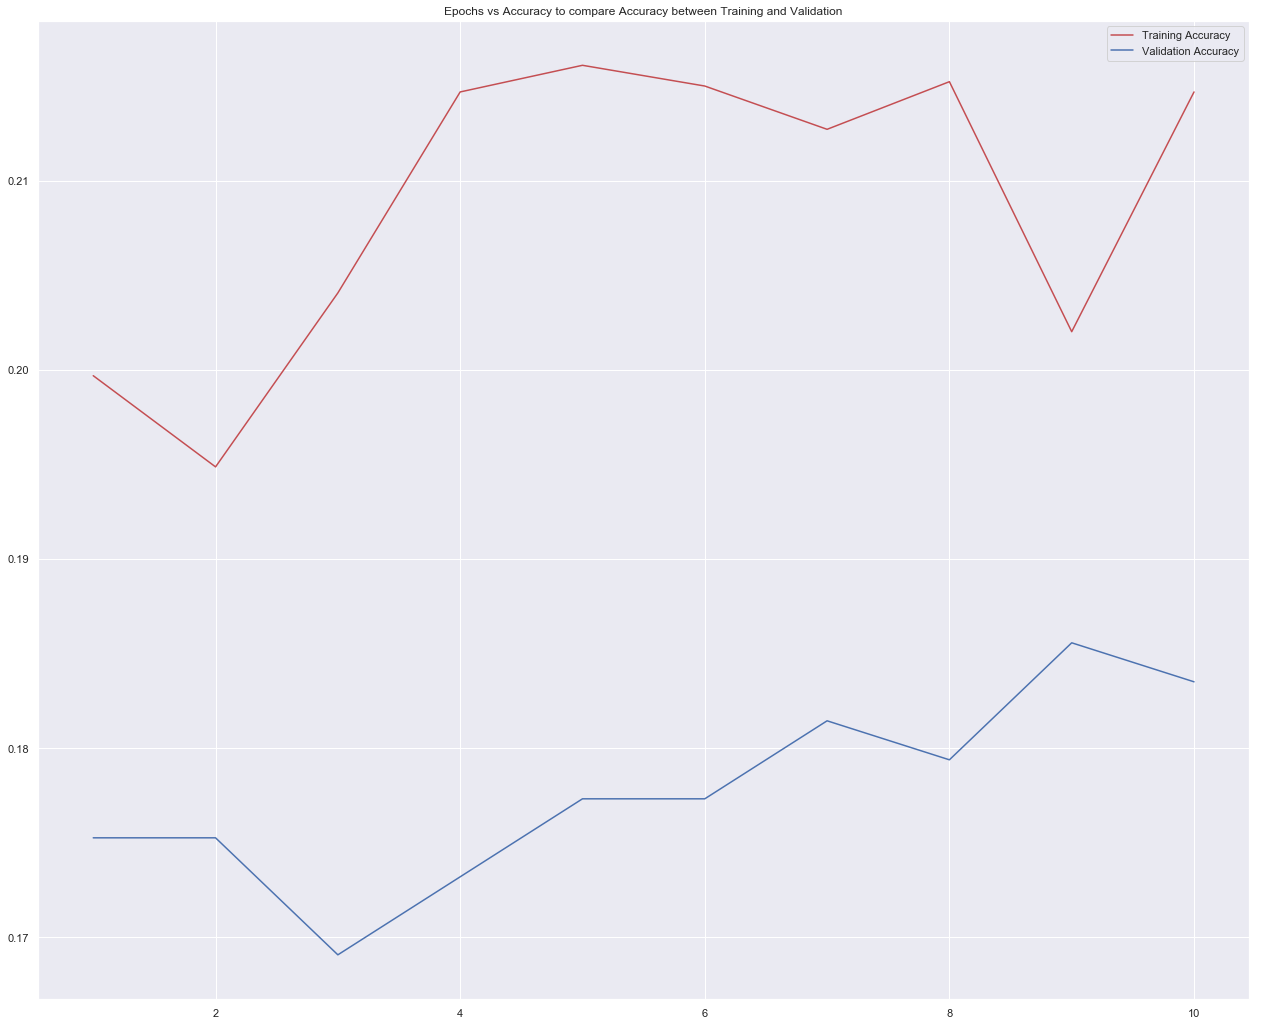

In [75]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Epochs vs Accuracy to compare Accuracy between Training and Validation')
plt.legend()

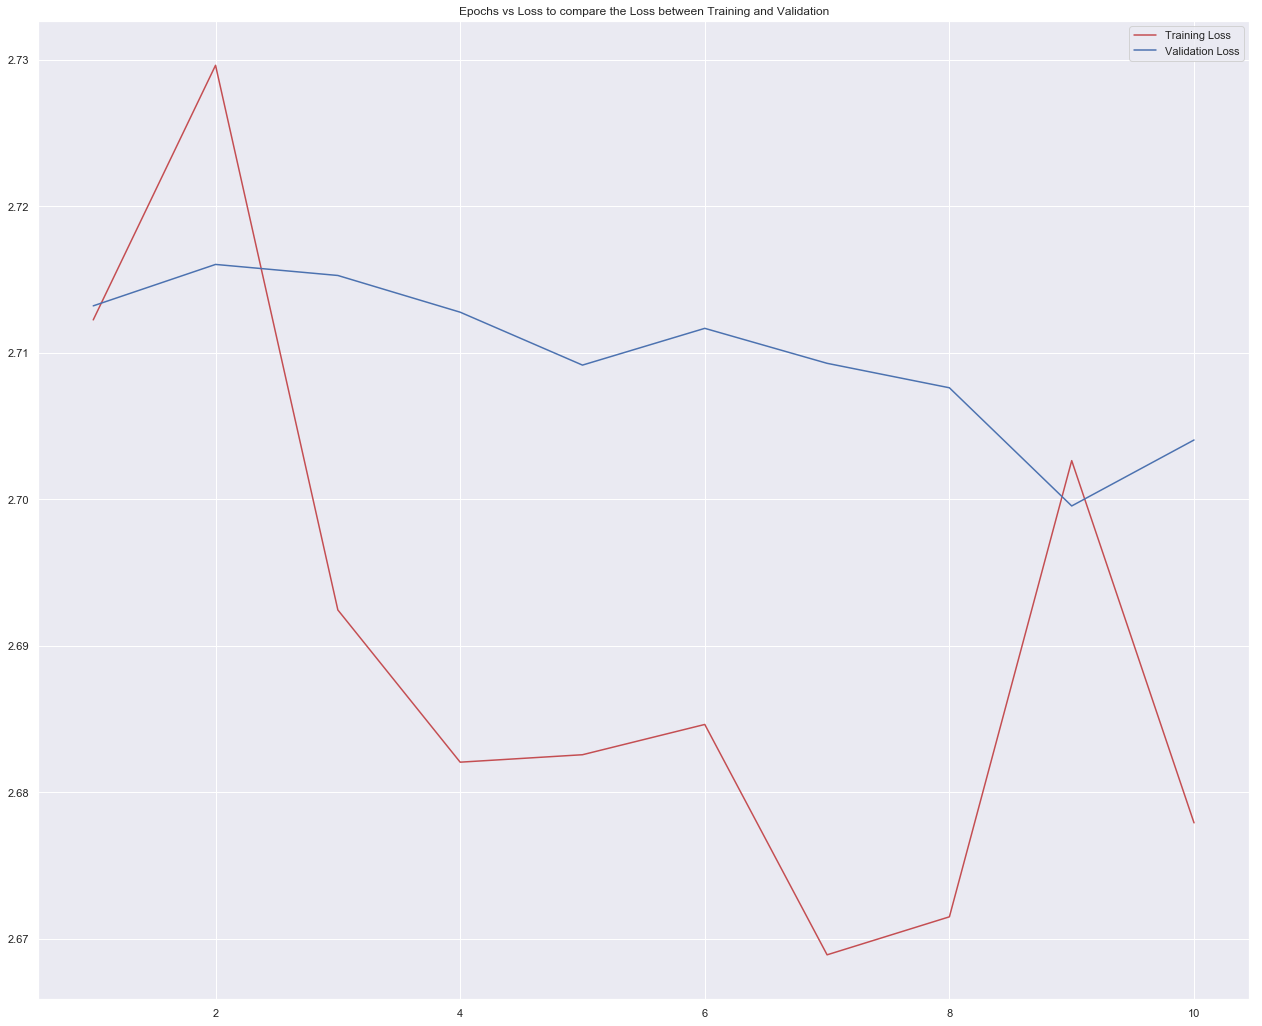

In [76]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Epochs vs Loss to compare the Loss between Training and Validation')
plt.legend()

In [77]:
models.load_model('groceries_1.h5')

In [78]:
groceries_model.evaluate(X_test, y_test)

100/100 [==============================] - 38s 382ms/step


[15.723074188232422, 0.02]

In [47]:
#-------------------------------------------------MODEL 2------------------------------------------------------#

In [48]:
#what do the evaluate output mean?
#how does test data affect the test accuracy?

In [49]:
groceries_model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizers.Adam(lr=1e-4), metrics = ['acc'])

In [50]:
gc.collect()

3270

In [51]:
checkpoint = ModelCheckpoint("groceries_2.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False,
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

In [52]:
history_2 = groceries_model.fit_generator(generator= train_gen, 
                                 steps_per_epoch= 100, 
                                 epochs= 10, 
                                 validation_data= val_gen, 
                                 validation_steps=100, 
                                 callbacks=[checkpoint,early])

Epoch 1/10
100/100 [==============================] - 1821s 18s/step - loss: 3.2810 - acc: 0.0925 - val_loss: 3.1422 - val_acc: 0.1134

Epoch 00001: val_acc improved from -inf to 0.11340, saving model to groceries_2.h5
Epoch 2/10
100/100 [==============================] - 1812s 18s/step - loss: 3.0897 - acc: 0.1082 - val_loss: 3.0946 - val_acc: 0.1237

Epoch 00002: val_acc improved from 0.11340 to 0.12371, saving model to groceries_2.h5
Epoch 3/10
100/100 [==============================] - 873s 9s/step - loss: 3.0213 - acc: 0.1322 - val_loss: 3.0237 - val_acc: 0.1134

Epoch 00003: val_acc did not improve from 0.12371
Epoch 4/10
100/100 [==============================] - 845s 8s/step - loss: 3.0070 - acc: 0.1279 - val_loss: 3.0429 - val_acc: 0.1155

Epoch 00004: val_acc did not improve from 0.12371
Epoch 5/10
100/100 [==============================] - 888s 9s/step - loss: 2.9775 - acc: 0.1375 - val_loss: 2.9642 - val_acc: 0.1670

Epoch 00005: val_acc improved from 0.12371 to 0.16701, sa

In [53]:
groceries_model.save_weights('grocereies_weights_2')

In [54]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

In [55]:
epochs = range(1, 1+len(acc))

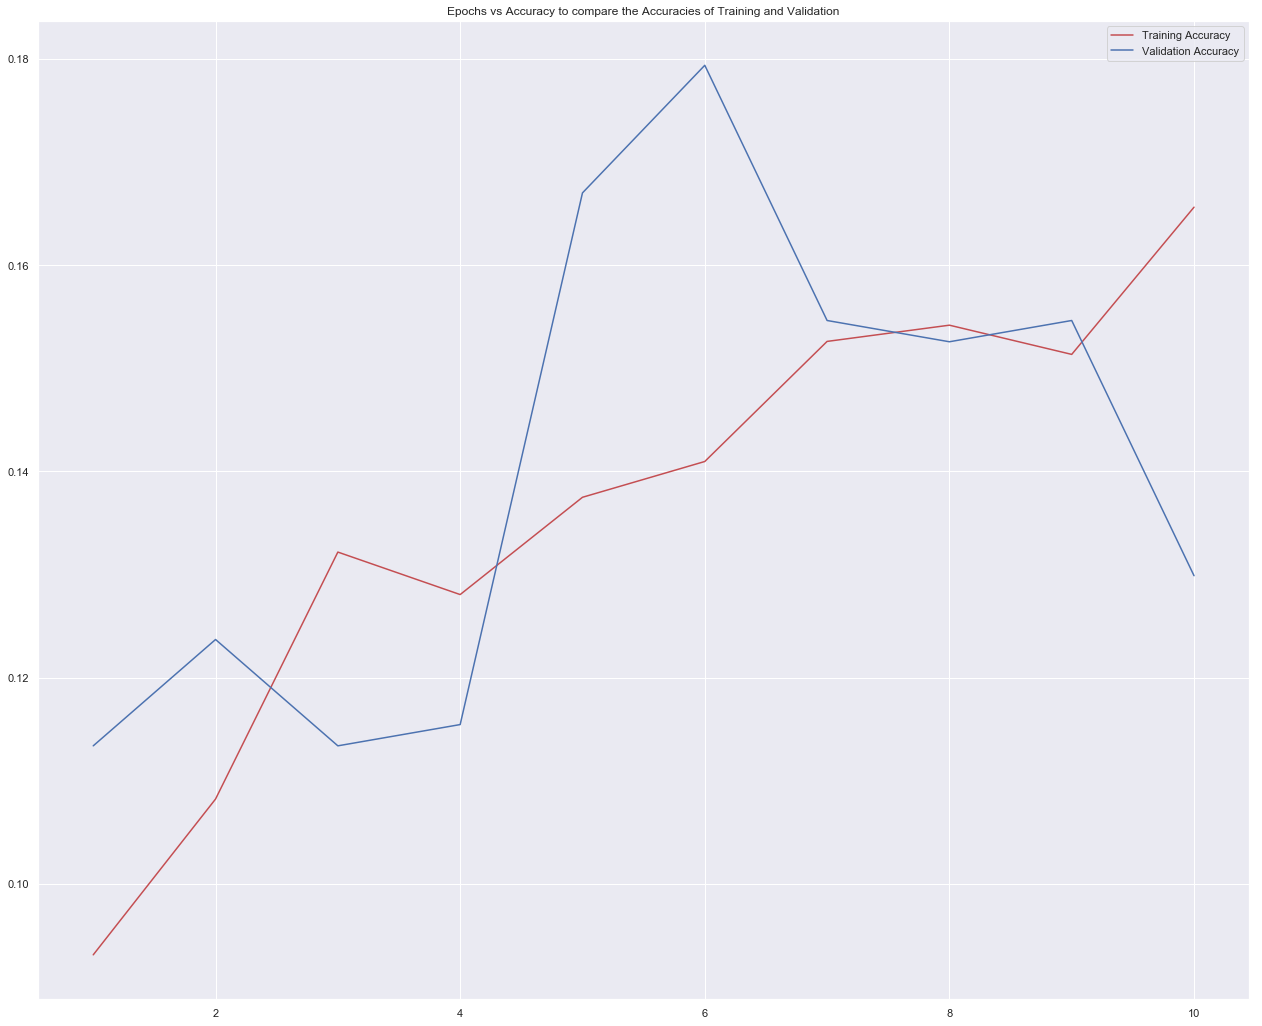

In [56]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Epochs vs Accuracy to compare the Accuracies of Training and Validation')
plt.legend()

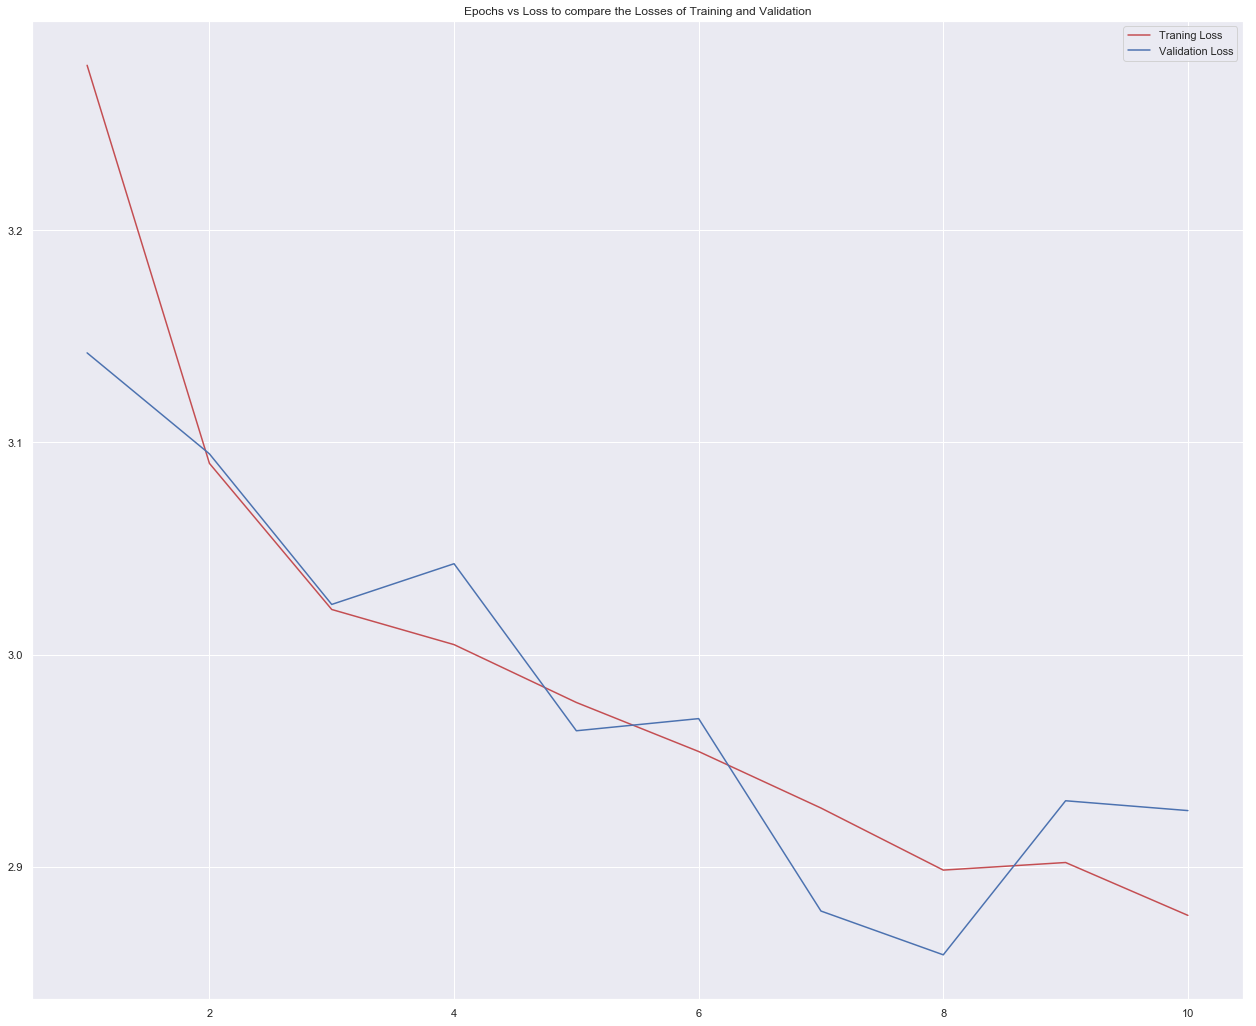

In [57]:
plt.plot(epochs, loss, 'r', label='Traning Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Epochs vs Loss to compare the Losses of Training and Validation')
plt.legend()

In [58]:
models.load_model('groceries_2.h5')

In [59]:
groceries_model.evaluate(X_test, y_test)

100/100 [==============================] - 40s 397ms/step


[12.902043228149415, 0.15]

In [60]:
#-----------------------------------------------------MODEL 3-------------------------------------------------------------#

In [49]:
groceries_model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3), metrics = ['acc'])

In [50]:
checkpoint = ModelCheckpoint("groceries_3.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False,
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

In [51]:
history_3 = groceries_model.fit_generator(generator= train_gen, 
                                 steps_per_epoch= 100, 
                                 epochs= 10, 
                                 validation_data= val_gen, 
                                 validation_steps=100, 
                                 callbacks=[checkpoint,early])

Epoch 1/10
100/100 [==============================] - 764s 8s/step - loss: 3.2282 - acc: 0.0699 - val_loss: 3.2224 - val_acc: 0.0536

Epoch 00001: val_acc improved from -inf to 0.05361, saving model to groceries_3.h5
Epoch 2/10
100/100 [==============================] - 772s 8s/step - loss: 3.1846 - acc: 0.0913 - val_loss: 3.2358 - val_acc: 0.0495

Epoch 00002: val_acc did not improve from 0.05361
Epoch 3/10
100/100 [==============================] - 786s 8s/step - loss: 3.1531 - acc: 0.0938 - val_loss: 3.1970 - val_acc: 0.0474

Epoch 00003: val_acc did not improve from 0.05361
Epoch 4/10
100/100 [==============================] - 776s 8s/step - loss: 3.1417 - acc: 0.1031 - val_loss: 3.2230 - val_acc: 0.0639

Epoch 00004: val_acc improved from 0.05361 to 0.06392, saving model to groceries_3.h5
Epoch 5/10
100/100 [==============================] - 791s 8s/step - loss: 3.1250 - acc: 0.0969 - val_loss: 3.2181 - val_acc: 0.0536

Epoch 00005: val_acc did not improve from 0.06392
Epoch 6/10


In [52]:
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

In [53]:
epochs = range(1, 1+len(acc))

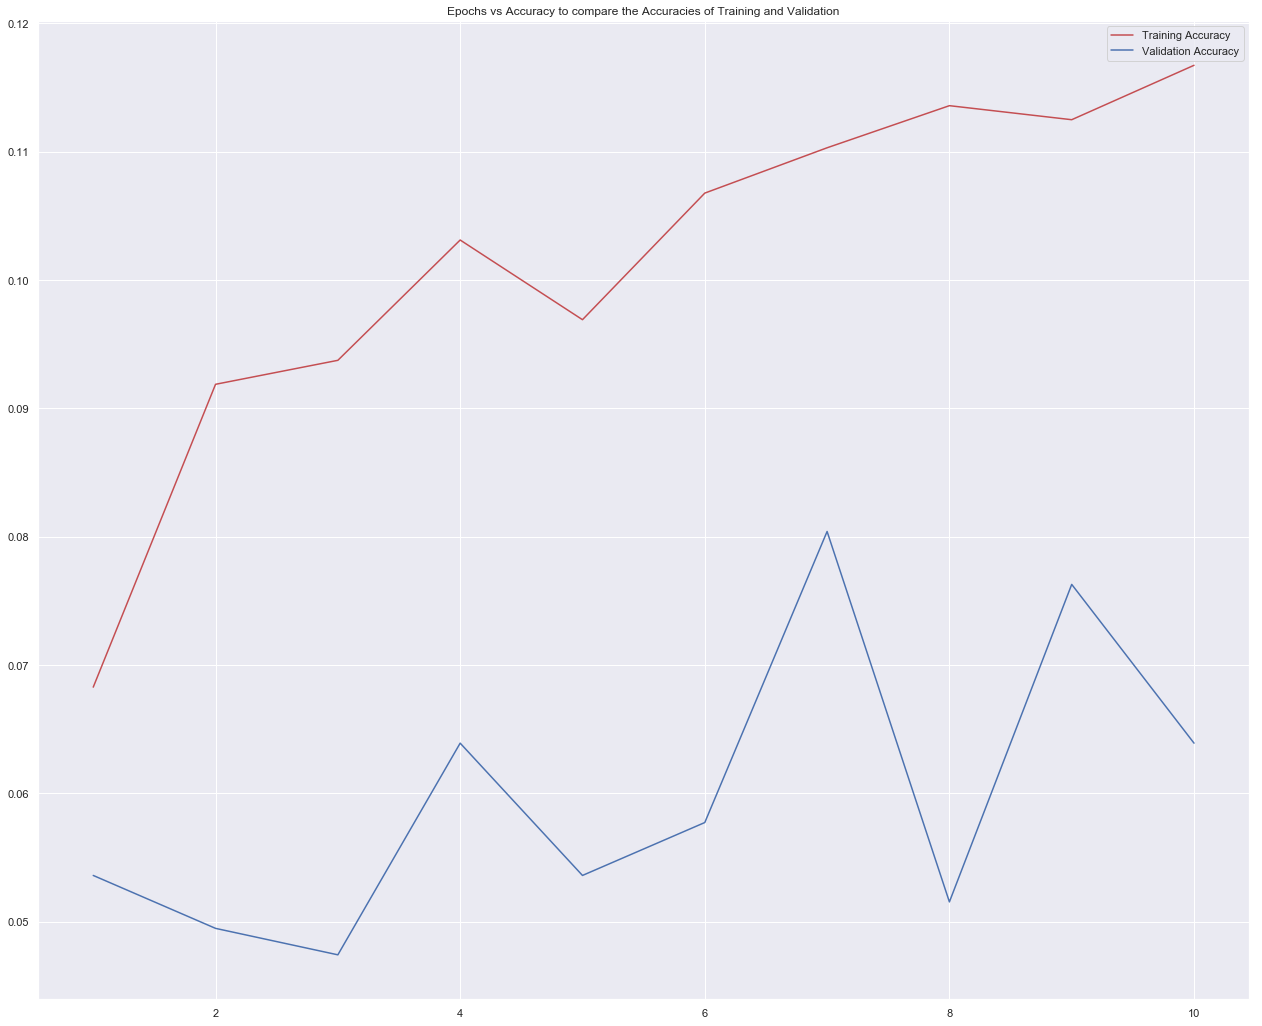

In [54]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Epochs vs Accuracy to compare the Accuracies of Training and Validation')
plt.legend()

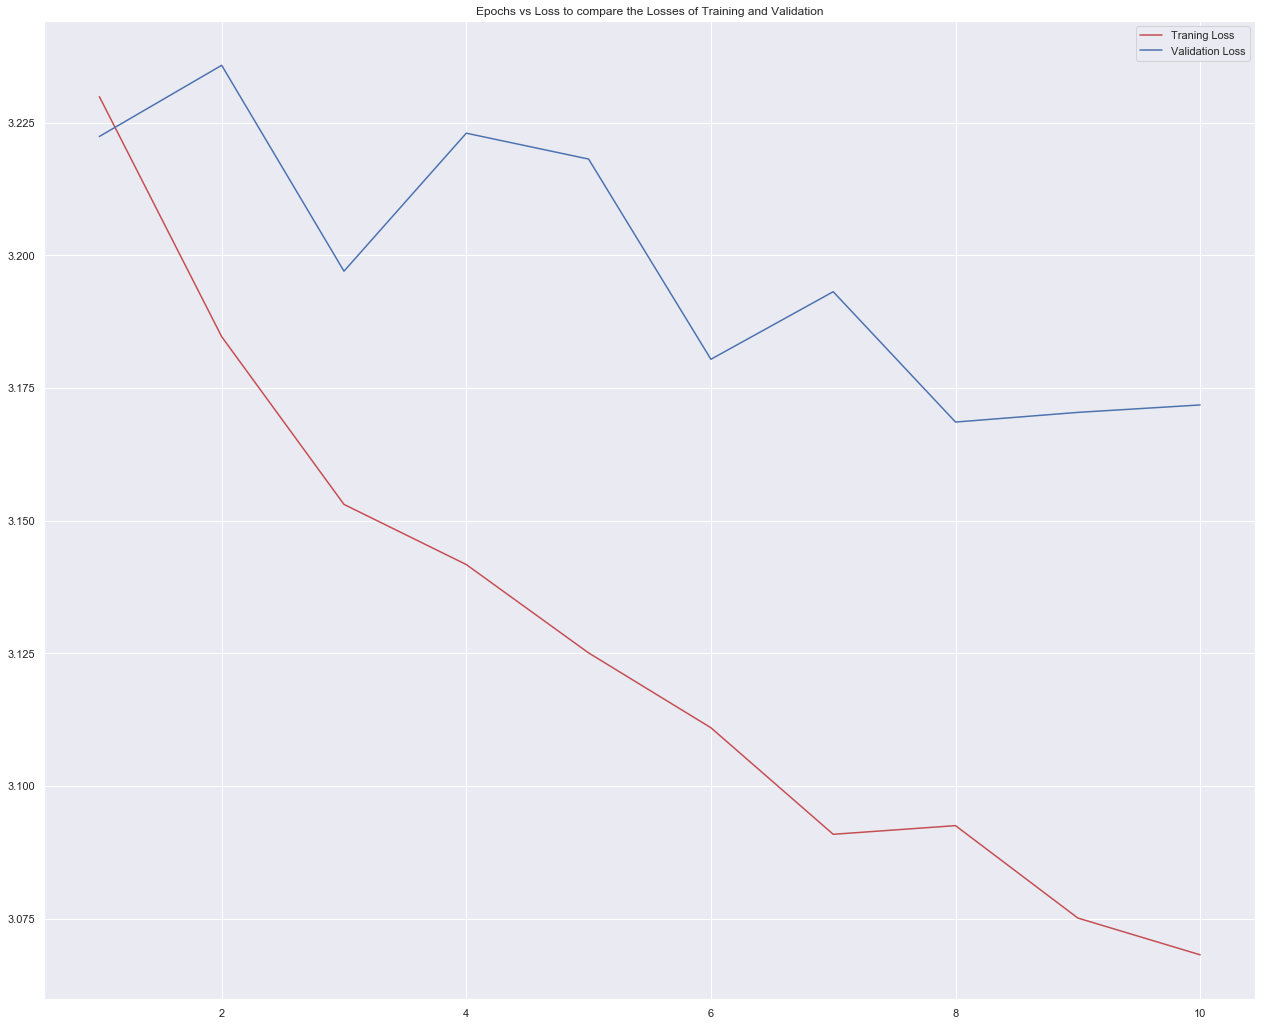

In [55]:
plt.plot(epochs, loss, 'r', label='Traning Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Epochs vs Loss to compare the Losses of Training and Validation')
plt.legend()

In [56]:
models.load_model('groceries_3.h5')

In [57]:
groceries_model.evaluate(X_test, y_test)

100/100 [==============================] - 33s 334ms/step


[12.490179481506347, 0.07]

In [58]:
#---------------------------------------------------MODEL 4-----------------------------------------------------------#

In [59]:
groceries_model.compile(loss='sparse_categorical_crossentropy', optimizer = optimizers.Adam(lr=1e-3), metrics = ['acc'])

In [60]:
checkpoint = ModelCheckpoint("groceries_4.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False,
                             mode='auto', 
                             period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')

In [61]:
history_4 = groceries_model.fit_generator(generator= train_gen, 
                                 steps_per_epoch= 100, 
                                 epochs= 10, 
                                 validation_data= val_gen, 
                                 validation_steps=100, 
                                 callbacks=[checkpoint,early])

Epoch 1/10
100/100 [==============================] - 1526s 15s/step - loss: 15.0295 - acc: 0.0610 - val_loss: 15.2208 - val_acc: 0.0557

Epoch 00001: val_acc improved from -inf to 0.05567, saving model to groceries_4.h5
Epoch 2/10
100/100 [==============================] - 1139s 11s/step - loss: 15.1106 - acc: 0.0625 - val_loss: 15.2208 - val_acc: 0.0557

Epoch 00002: val_acc did not improve from 0.05567
Epoch 3/10
100/100 [==============================] - 1163s 12s/step - loss: 15.2165 - acc: 0.0559 - val_loss: 15.2208 - val_acc: 0.0557

Epoch 00003: val_acc did not improve from 0.05567
Epoch 4/10
100/100 [==============================] - 1165s 12s/step - loss: 15.1198 - acc: 0.0619 - val_loss: 15.2208 - val_acc: 0.0557

Epoch 00004: val_acc improved from 0.05567 to 0.05567, saving model to groceries_4.h5
Epoch 5/10
100/100 [==============================] - 911s 9s/step - loss: 15.1409 - acc: 0.0606 - val_loss: 15.2208 - val_acc: 0.0557

Epoch 00005: val_acc did not improve from 0

In [62]:
acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

In [63]:
epochs = range(1, 1+len(acc))

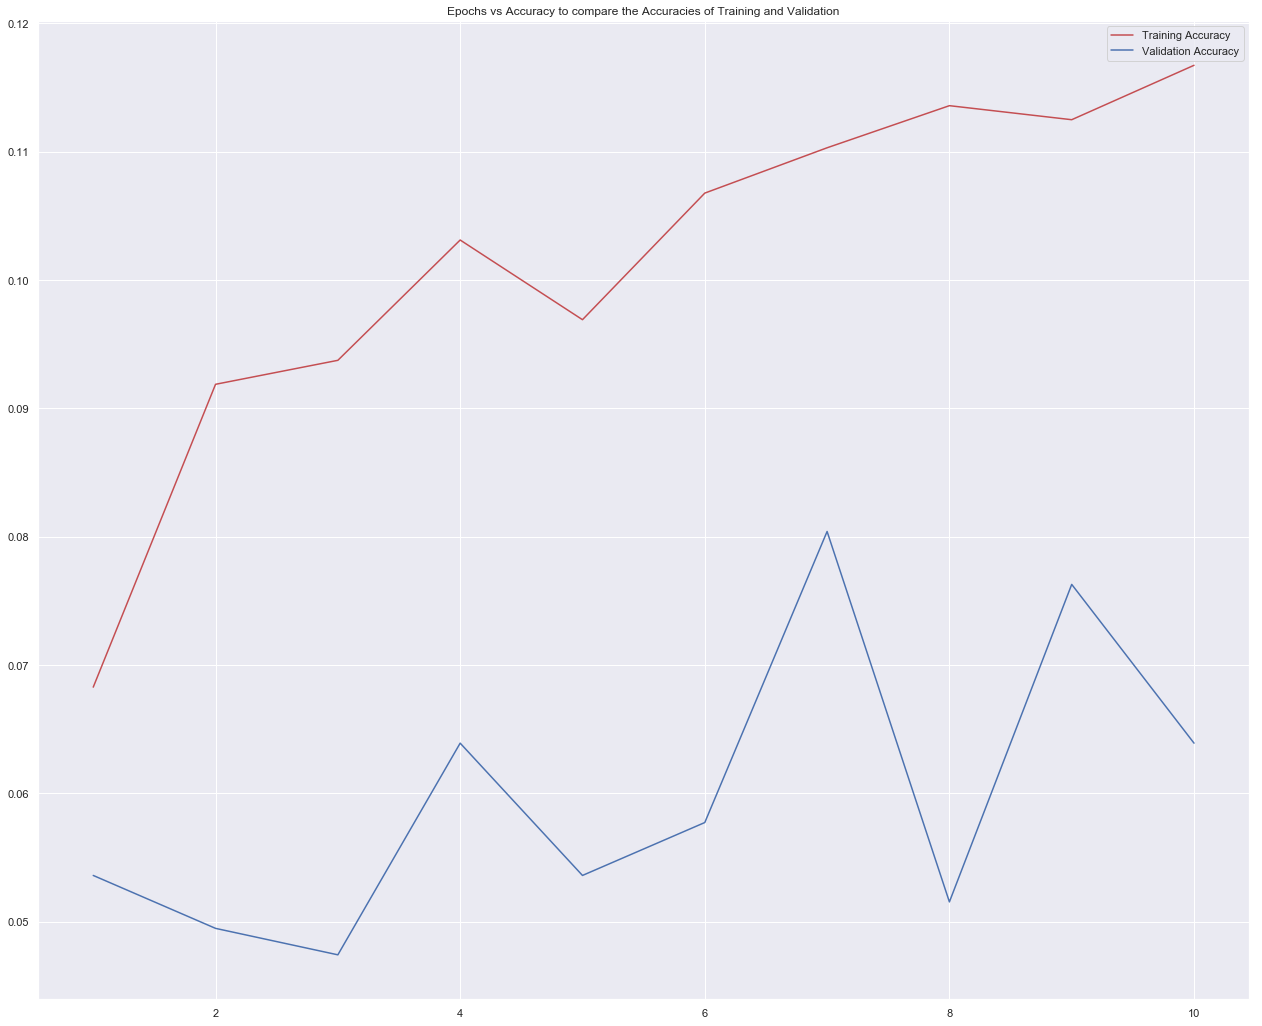

In [64]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Epochs vs Accuracy to compare the Accuracies of Training and Validation')
plt.legend()

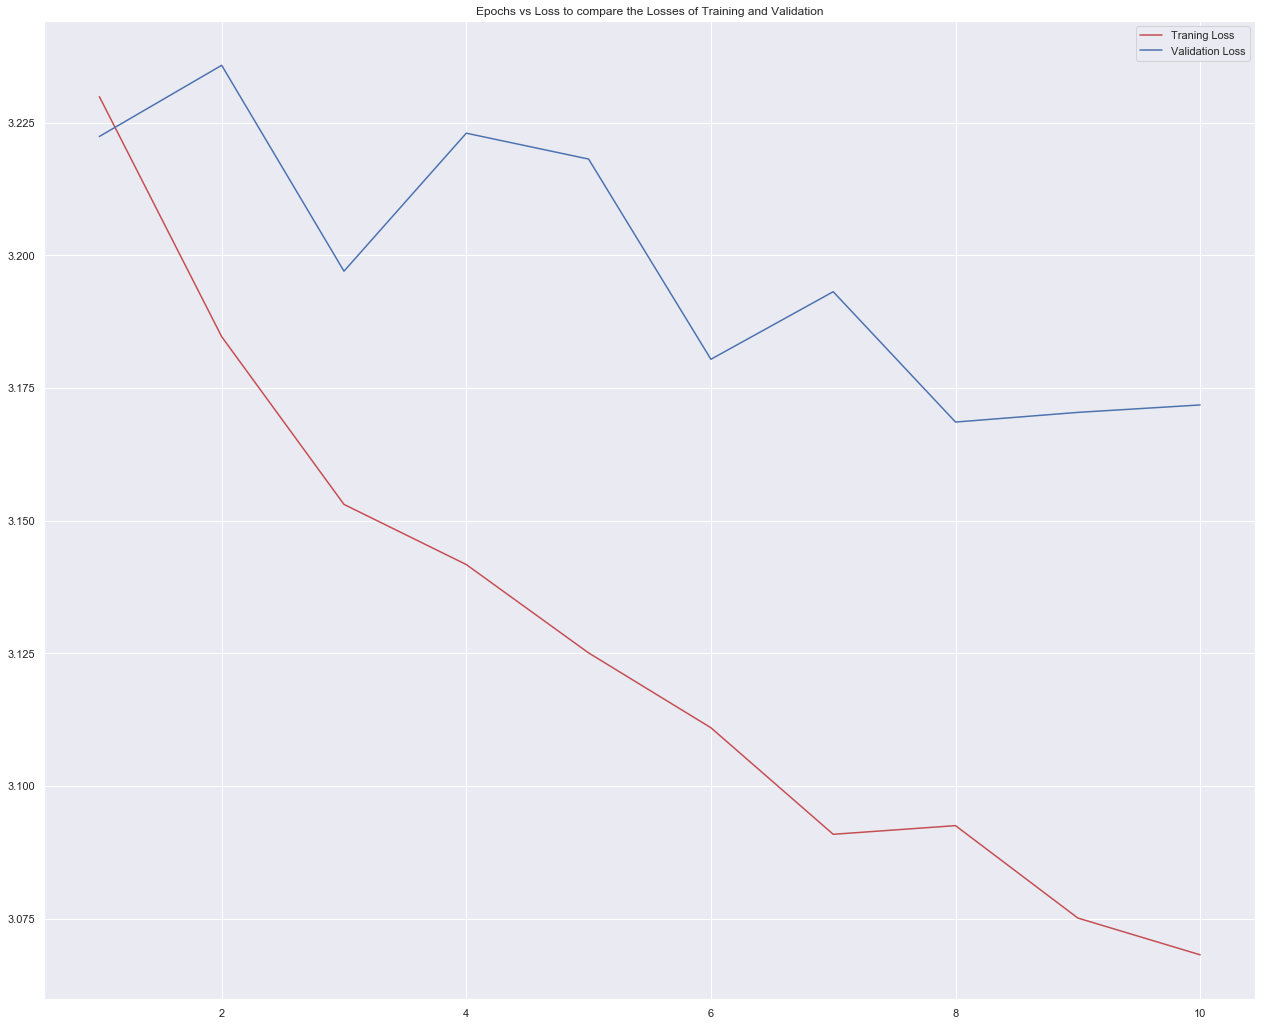

In [65]:
plt.plot(epochs, loss, 'r', label='Traning Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Epochs vs Loss to compare the Losses of Training and Validation')
plt.legend()

In [66]:
models.load_model('groceries_4.h5')

In [67]:
groceries_model.evaluate(X_test, y_test)

100/100 [==============================] - 36s 356ms/step


[14.506287078857422, 0.1]